# [모델 성능 평가지표(Metric)](https://scikit-learn.org/stable/modules/model_evaluation.html#)
> 실제값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정하는 방법


# 회귀 모형 성능 측정

## Linear Regression 학습 및 예측

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

data = diabetes.data
target = diabetes.target
data.shape , target.shape

((442, 10), (442,))

In [2]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train,x_valid , y_train, y_valid = train_test_split(data, target, random_state=SEED)
x_train.shape, x_valid.shape , y_train.shape, y_valid.shape

((331, 10), (111, 10), (331,), (111,))

In [3]:
from sklearn.linear_model import LinearRegression
# 모델 생성
model = LinearRegression()
# 모델 학습
model.fit(x_train,y_train)
# 모델 예측
pred = model.predict(x_valid)

In [5]:
pred.shape, y_valid.shape

((111,), (111,))

## 회귀 평가 지표

### R2(결정계수; Coefficient of Determination)
- 회귀식이 얼마나 정확한지를 나타내는 숫자 
- $ 0 <= R^2 <= 1$  

$$
R^2 = { SSR \over SST } = { \sum{(\hat{y}_i - \bar{y} )} \over \sum{(y_i - \bar{y})^2 } } = { 회귀선에 의해 설명되는 변동 \over 전체변동 }
$$

- 기호 설명
  - $ \bar{y} = y 평균값 $
  - $ \hat{y} = y 예측값 $
  - $ y = y 실제값 $

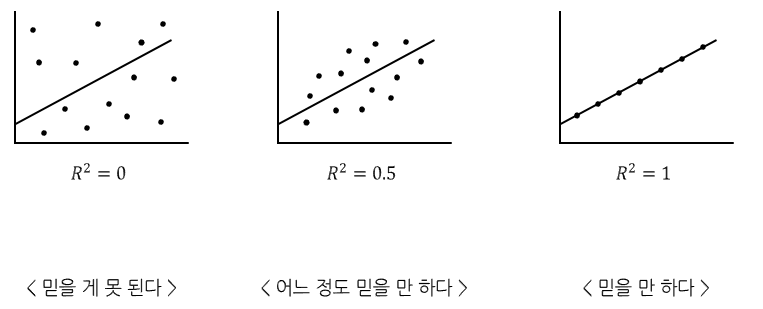

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, pred)
r2

0.4849058889476756

### [MSE(Mean Squared Error)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
- 실제값과 예측값의 차이를 제곱한뒤 평균화
- 이상치 민감
- 직관적이지 못하다.
- 손실함수로 주로 사용한다.
$$
MSE = \frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}
$$

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_valid,pred)
mse

2848.3106508475053

### RMSE(Root Mean Squared Error)
- MSE에 루트
- 이상치 민감
$$
RMSE = \sqrt{\frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}}
$$

In [ ]:
import numpy as np
np.sqrt(mse)

53.369566710321955

### MAE(Mean Absolute Error)
- 실제값과 예측값의 차이를 절대값으로 변환해서 평균화
$$
MAE = \frac{1}{n}{\sum_{i=1}^{n}|y_i-\hat{y}_i|}
$$

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_valid,pred)
mae

41.54850685988061

### [MAPE(Mean Absolute Percentage Error)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html)
- 실제값에 대한 절대오차 비율의 평균을 퍼센트로 표현
- MSE, RMSE의 단점을 보완

$$
MAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{y_i}}
$$

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_valid, pred)

0.37310970433744683

### SMAPE(Symmetric Mean Absolute Percentage Error)
- 기존 MAPE의 단점 보완
- MAPE와 다른점은 각 실제값과 예측값을 절대값으로 변경후 합으로 나눈다.
- MAPE와 다르게 실제값에 0이 존재해도 계산이 가능하다.
- 과소추정에 대한 패널티를 줄수가 있다.
$$
SMAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{{|y_i|}+|\hat{y_i}|}}
$$

In [ ]:
def smape(true,pred):
    error = np.abs(true-pred) / (np.abs(true) + np.abs(pred))
    return np.mean(error)
    
smape(y_valid,pred)

0.1527140597913506

# 분류 모형 성능 평가

## 혼동행렬(Confusion Matrix)

> 분석 모델에서 구한 분류의 예측 범주와 데이터의 실제 분류 범주를 교차 표 형태로 정리한 행렬

- Accuracy: 정확도
- Specificity: 특이도
- Recall, Sensitivity: 민감도
- Precision: 정밀도

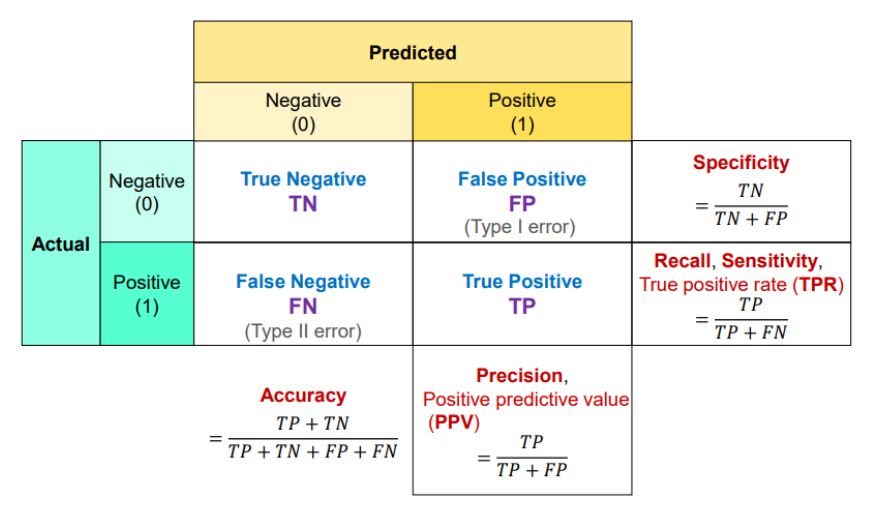

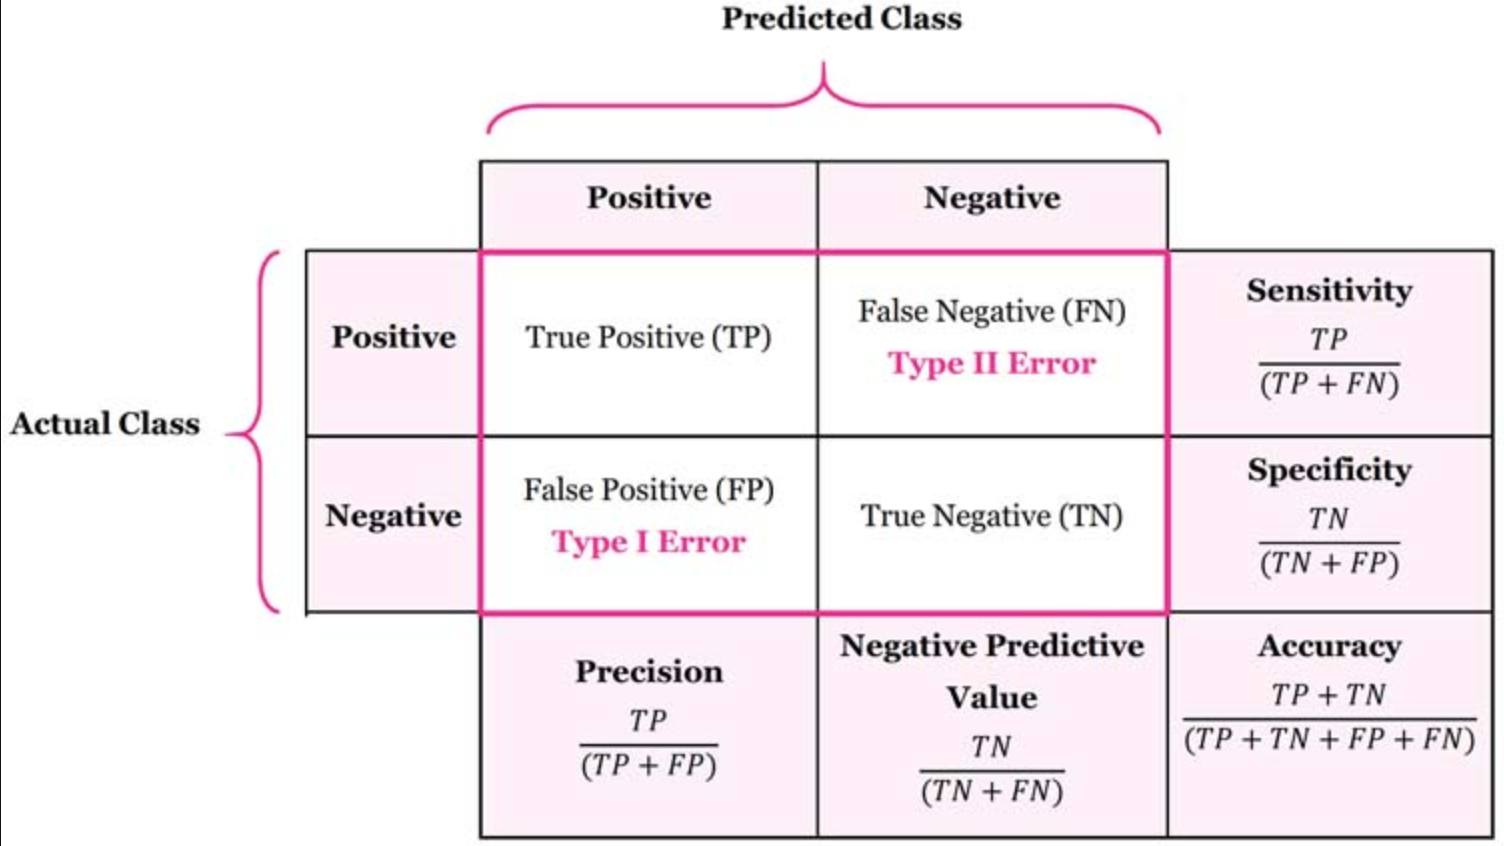

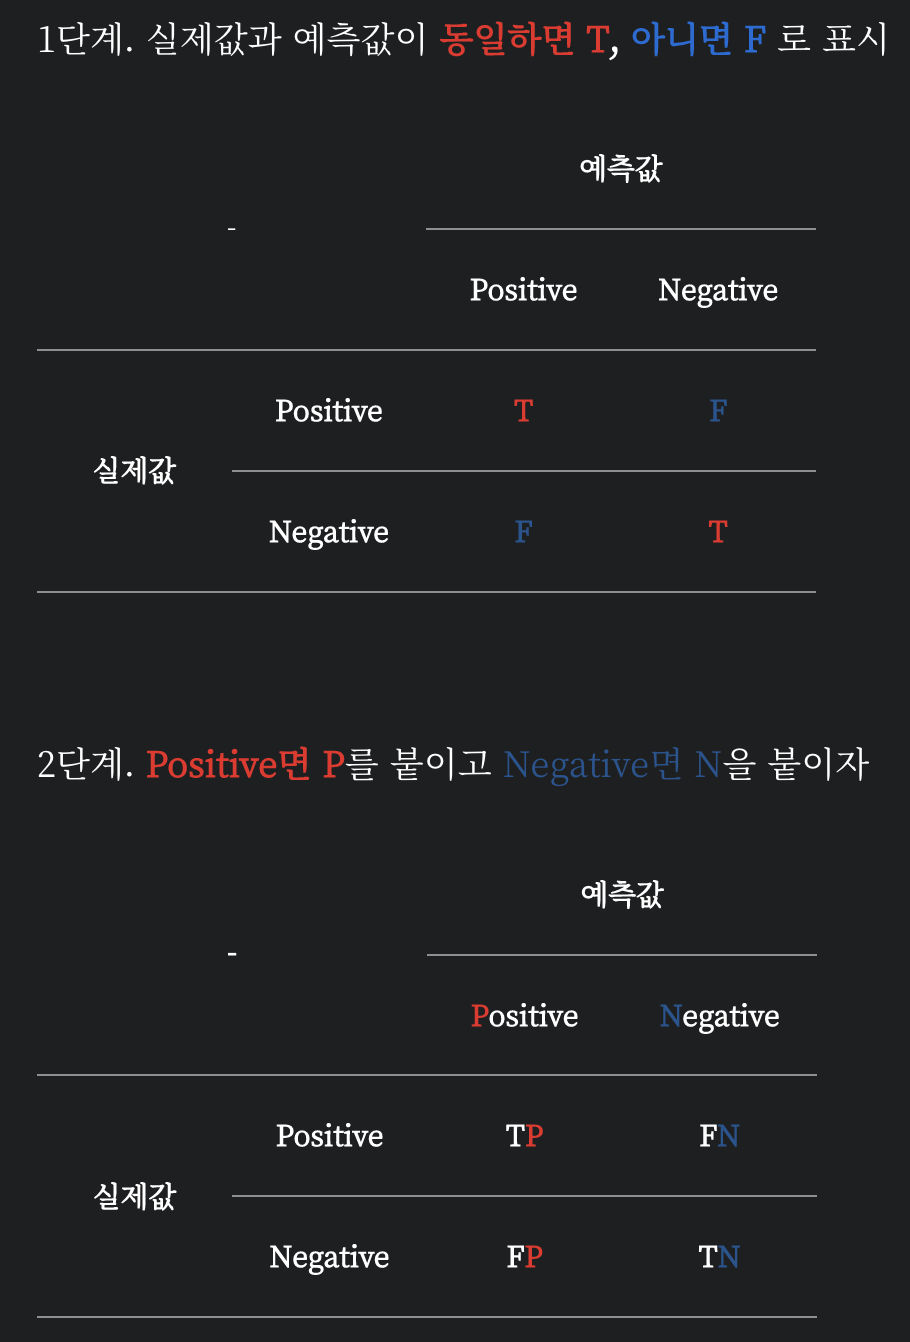

- TP(True Positive)
> 참긍정.   
> 병에 관해 예라고 예측한 환자가 실제 병을 가진 경우
- TN(True Negative)
> 참부정.  
> 병에 관해 아니오라고 예측한 환자가 실제로 병이 없는 경우
- FP(False Positive)
> 거짓긍정.  
> 병에 관해 예라고 예측한 환자가 실제로는 병이 없는 경우  
- FN(False Negative)
> 거짓부정.  
> 병에 관해 아니오라고 예측한 환자가 실제로는 병이 있는 경우

### [평가지표](https://dojinkimm.github.io/ml/2019/10/26/handson-ch3.html)

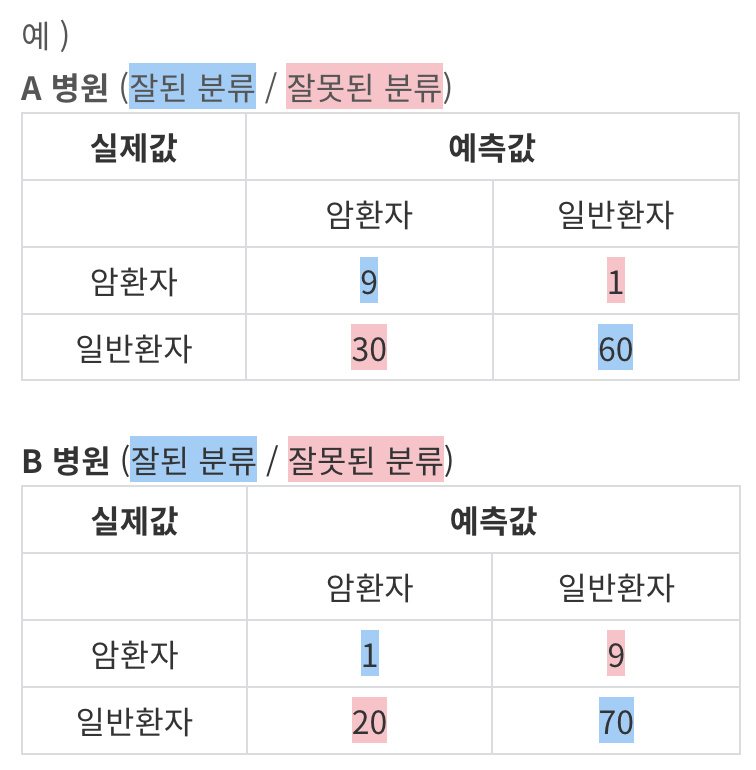

#### 예제

In [ ]:
import numpy as np 
import pandas as pd 

from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
data = digits.data

# Binary Classifier
target = (digits.target == 5).astype(int)

In [ ]:
int(5 == 5)

1

In [ ]:
int( 4 == 5)

0

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_valid, y_train, y_valid = train_test_split(data, target, random_state=SEED)
x_train.shape , x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

In [ ]:
# 원본 데이터
digit = data[5]
digits.target[5]

5

In [ ]:
# 변경한 데이터터
target[5]

1

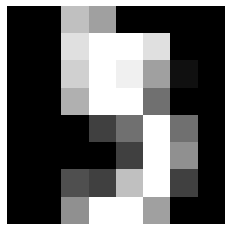

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 벡터 변환
digit_img = digit.reshape(8, 8)

plt.imshow(digit_img, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

sgd_clf.predict([digit])

array([0])

In [ ]:
from sklearn.model_selection import cross_val_predict # 교차검증

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=5)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[1217,    7],
       [   8,  115]])

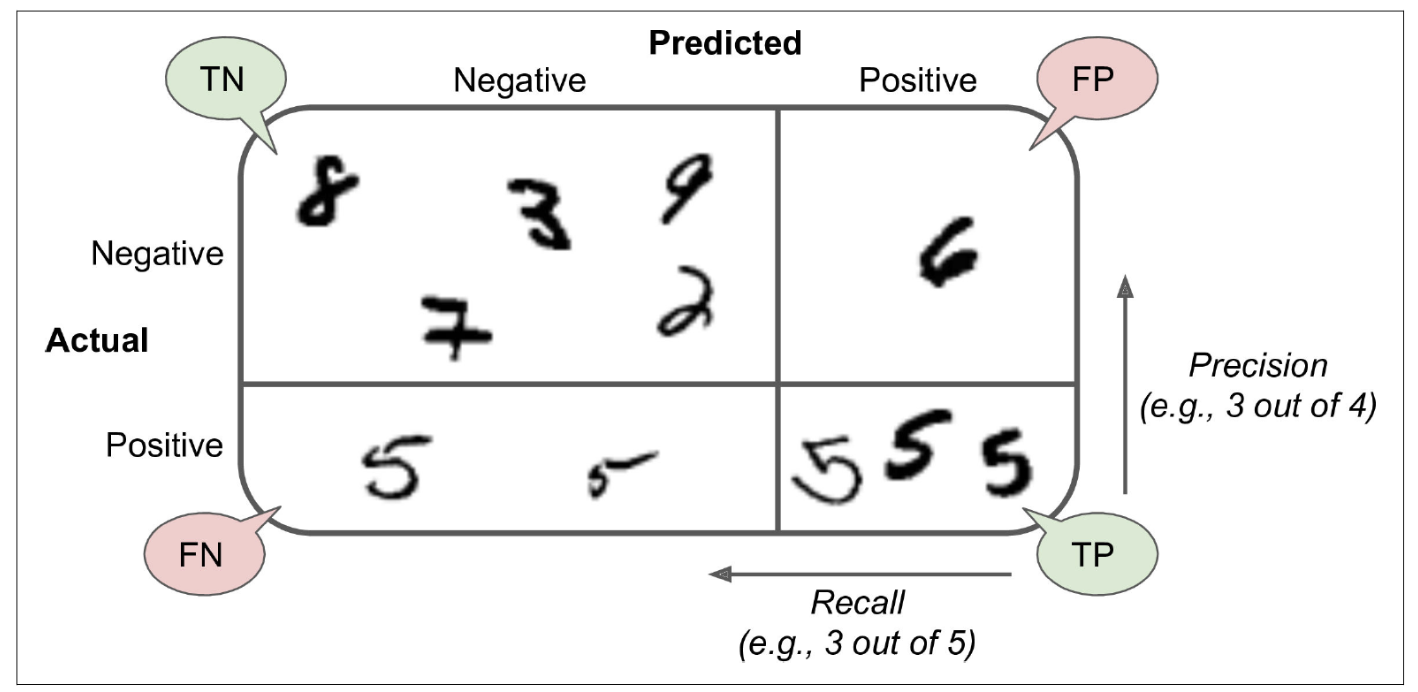

#### 모델 예측

- Dummy 예측

In [6]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train,y_train)
pred_dummy = dummy.predict(x_valid)

- 모델 예측

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

pred_clf = sgd_clf.predict(x_valid)

#### Accuracy(정확도)
> 정확도는 올바른 총 예측 수의 비율이다.  

$$
Accuracy = { TP + TN \over TP + FN + FP + TN }
$$
  
예)
A병원의 정확도 = (9+60) / (9+60+1+30) = 0.69  
B병원의 정확도 = (1+70) / (1+70+9+20) = 0.71  
  
정확도는 B병원이 높지만 암을 기준으로 하면 B가 더 안좋다.

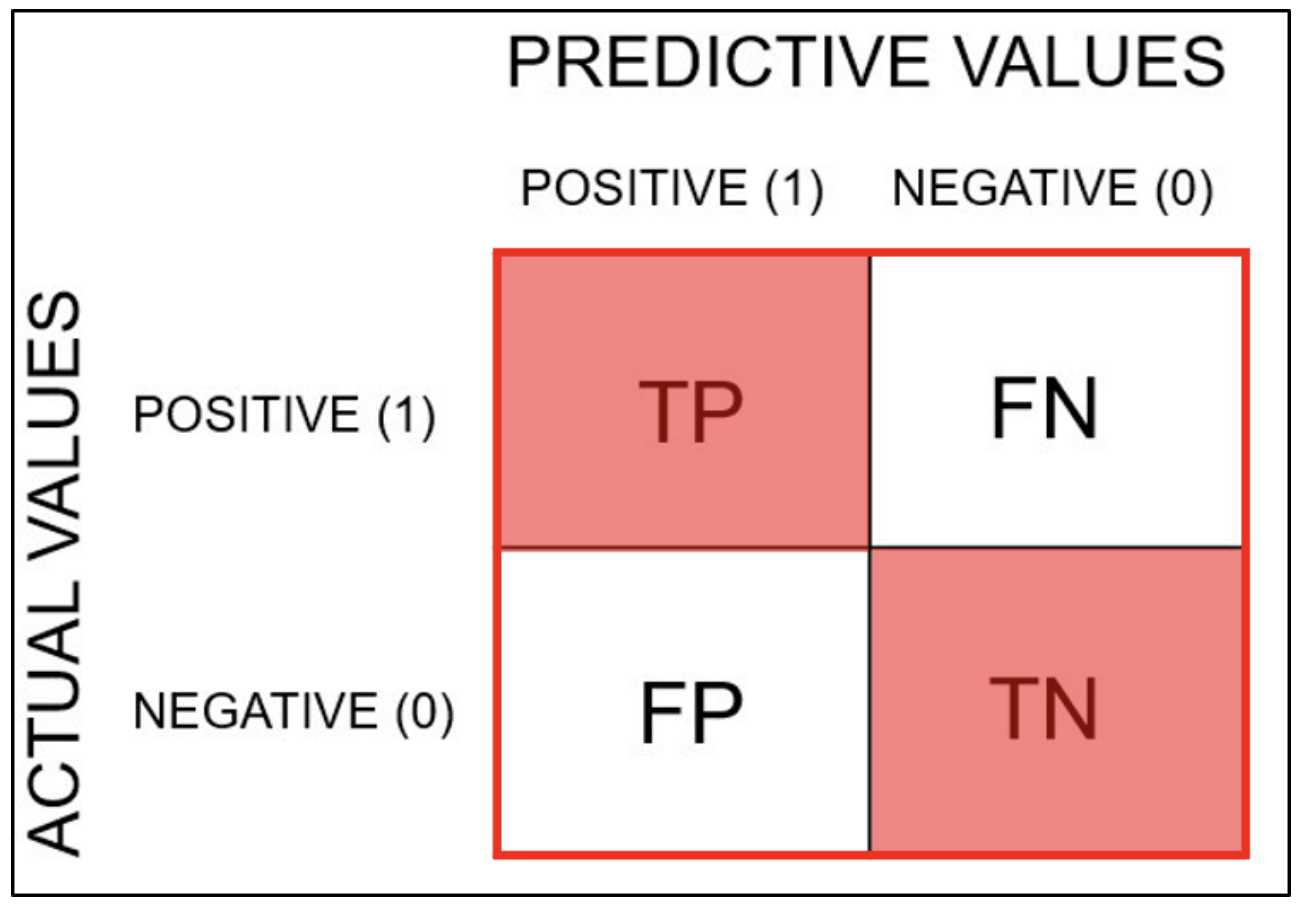

##### Accuracy 의 한계
- 오류중에서 FN 오류를 줄이는 것이 더 중요한 경우
- 오류 중에 FP 오류를 줄이는 것이 더 중요한 경우
- 정확도는 위에 두가지 오류에 정도의 차이를 구분할수 없기 때문에 적절한 성능지표가 될수 없다.
- 음성(0)이 양성(1)보다 훨씬 많은경우 음성(0)으로만 예측해도 높은 정확도를 보이기 때문에 적절한 성능지표가 될수없다.

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = accuracy_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.009009009009009009
model: 0.009009009009009009


#### Precision(정밀도)
> - 정밀도는 올바르게 분류된 긍정적인 예의 총 수와 예측된 긍정적인 예의 총 수의 비율이다. 긍정적인 예측에서 얻은 정확성을 보여준다.  
> - FP 줄이는 것이 목표일 때 사용  
  
$$
Precision = { TP \over TP + FP }
$$

예) A모델의 암환자 정밀도 = 9/(9+30) = 0.23.  
B모델의 암환자 정밀도 = 1/(1+20) = 0.04   
 
정확도는 B모델이 높지만 정밀도는 A모델이 높다.

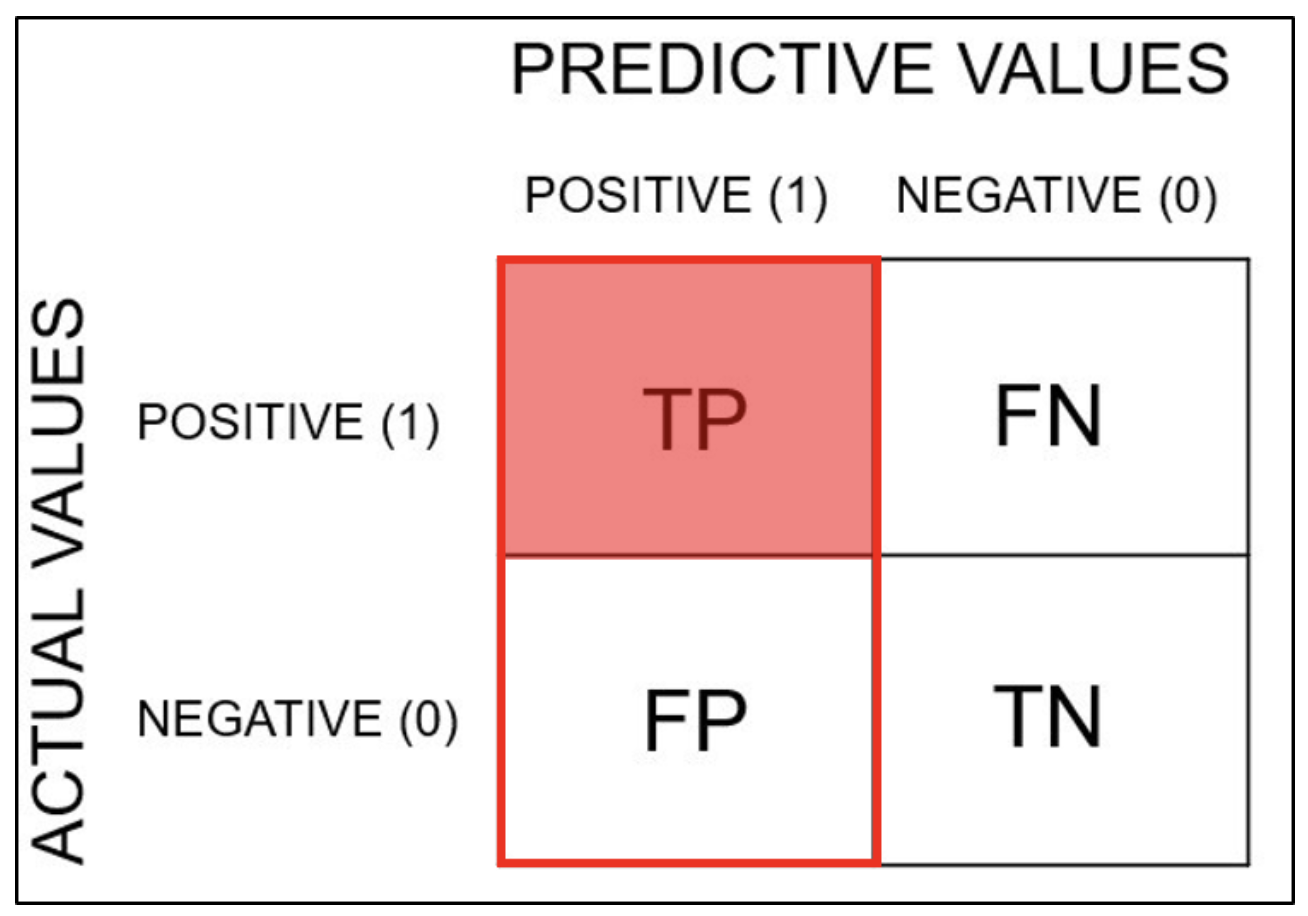

In [ ]:
from sklearn.metrics import precision_score
score = precision_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = precision_score(y_valid, pred_clf)
print(f"model: {score}")

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

#### Sensitivity(민감도) = Recall(재현도) = TPR
> - 민감도는 TPR(True Positivie Rate) 또는 Recall이라고도 한다.  
> - 분류기에 의해 양성으로 분류된 양성 사례의 척도이다.
> - FN 줄이는 것이 목표일 때 사용  
  
$$
Recall = { TP \over TP + FN }
$$

예) A모델의 암환자 재현율 = 9/(9+1) = 0.9  
B모델의 암환자 재현율 = 1/(1+9) = 0.1   

암환자 재현율을 기준으로 더 나은 모델은 A모델이다. 
> 실제 암환자들이 병원에 갔을 때, 암환자라고 예측될 확률.  
> 조기에 정확하게 발견해서 신속하게 처리할 수 있는 올바른 모델.  

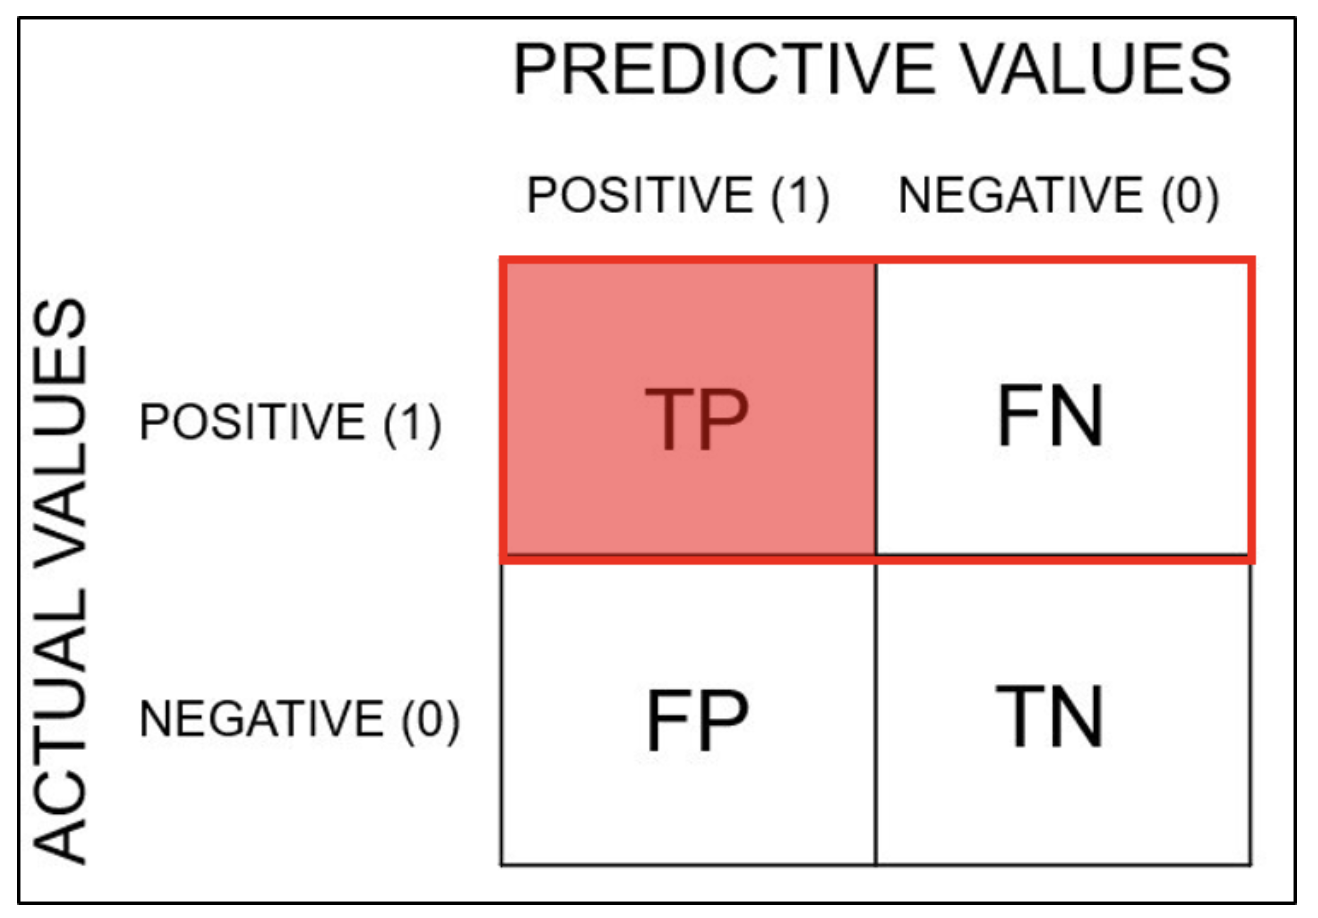

In [ ]:
from sklearn.metrics import recall_score
score = recall_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = recall_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.0
model: 0.8983050847457628


#### F1 Score
> F1 Score는 분류 모델에서 사용되는 머신러닝 Metric입니다.  
> Precision(정밀도)과 Recall(재현도)으로 F1 Score가 구성되고 불균형한 데이터가 잘 동작하는지에 대한 평가지표가 됩니다.  
  
$$
F1-Score = { 2 * Presicion * Recall \over Precision + Recall }
$$   

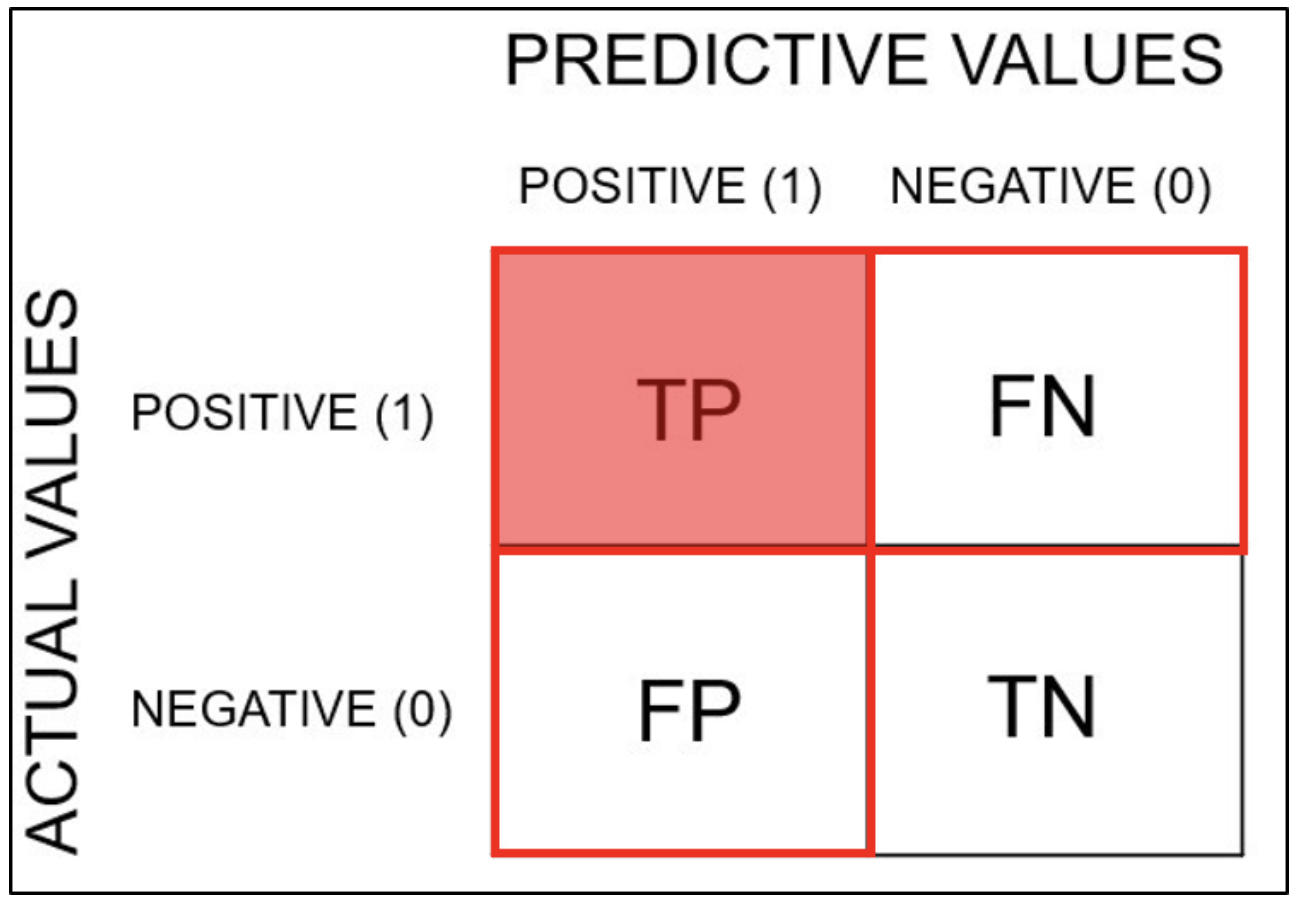

In [ ]:
from sklearn.metrics import f1_score
score = f1_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = f1_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.0
model: 0.9464285714285715


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, pred_dummy))
print('-'*100)
print(classification_report(y_valid, pred_clf))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       391
           1       0.00      0.00      0.00        59

    accuracy                           0.87       450
   macro avg       0.43      0.50      0.46       450
weighted avg       0.75      0.87      0.81       450

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       391
           1       1.00      0.90      0.95        59

    accuracy                           0.99       450
   macro avg       0.99      0.95      0.97       450
weighted avg       0.99      0.99      0.99       450



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Precision-Recall Trade-off

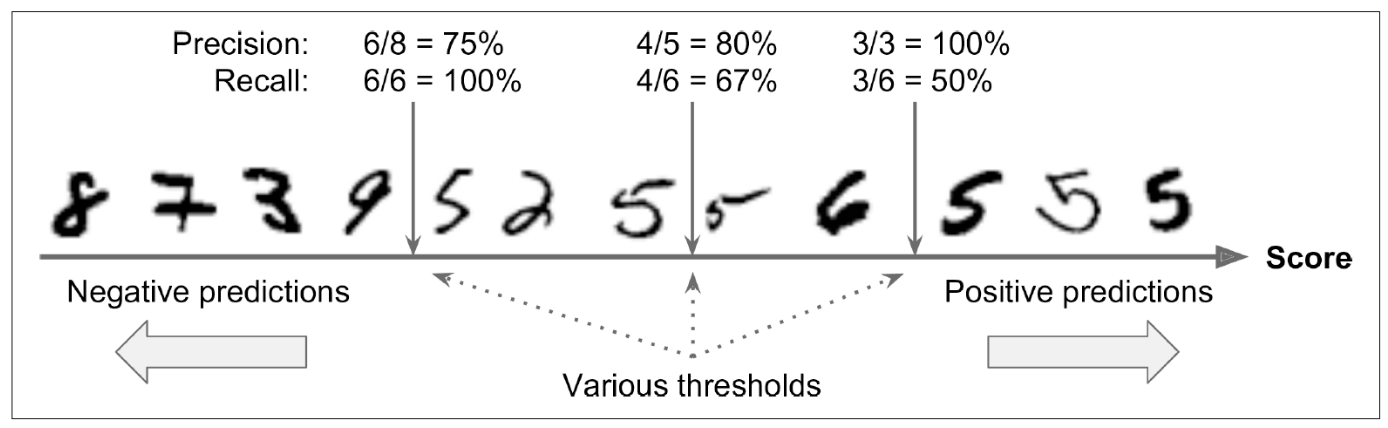

#### 임계값(Thresholds)
- 모델은 분류에서 확률(0~1) 또는 음수에서 양수 사이에 실수를 예측값으로 출력
- 사이킷런에서는 `predict_proba()`, `dicision_funtion()` 제공
  - `predict_proba()`: 0.5 이상이면 1로 예측
  - `dicision_funtion()`: 0 이상이면 1로 예측

In [ ]:
pred_proba = sgd_clf.decision_function(x_valid)

In [ ]:
threshold = 0 # 사이킷런의 디폴트값
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(1.0, 0.8983050847457628)

In [ ]:
threshold = 30000
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [ ]:
threshold = -30000
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.13111111111111112, 1.0)

- DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# 모델 생성
tree = DecisionTreeClassifier(max_depth=3,random_state=SEED)
# 모델 학습
tree.fit(x_train,y_train)
# 모델 평가: predict -> predict_proba(확률)을 이용해 threshold를 적용할 결과
pred_tree = tree.predict(x_valid)

In [ ]:
pred_tree[:3]

array([0, 0, 0])

In [ ]:
pred_proba = tree.predict_proba(x_valid)[:,1]

In [ ]:
pred_proba[:3]

array([0.02371542, 0.01059322, 0.01059322])

In [ ]:
threshold = 0.5 # 사이킷런의 디폴트값
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.9811320754716981, 0.8813559322033898)

In [ ]:
threshold = 0.9
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.9811320754716981, 0.8813559322033898)

In [ ]:
threshold = 0.1
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.8813559322033898, 0.8813559322033898)

### 1종 오류, 2종 오류

#### [귀무가설](https://drhongdatanote.tistory.com/59)
> 모집단(실제)의 특성에 대해 옳다고 제안하는 잠정적인 주장  
> 모델이 학습한 예측이 실제 데이터에 맞다고 주장  

#### [오류 해석](https://drhongdatanote.tistory.com/76)
- 1종 오류
> 귀무가설(H0)가 실제로는 참이어서 채택해야 함에도 불구하고 표본의 오차 때문에 이를 채택하지 않은 오류를 말합니다.  
> 보통 $\alpha$(알파)로 표기하고 유의수준이라고 부릅니다.  
- 2종 오류
> 귀무가설(H0)가 거짓이라서 채택하지 말아야 하는데, 표본의 오차 때문에 이를 채택하는 오류를 말합니다.   
> 보통 $\beta$(베타)로 표기합니다.

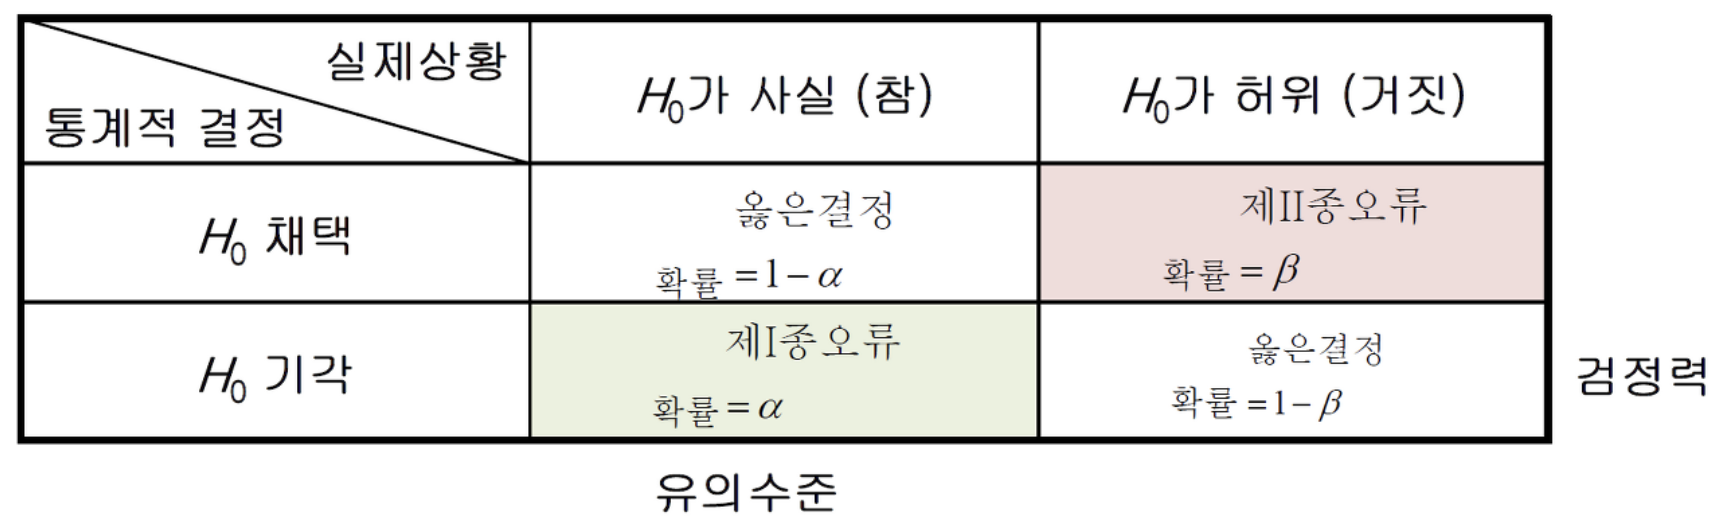

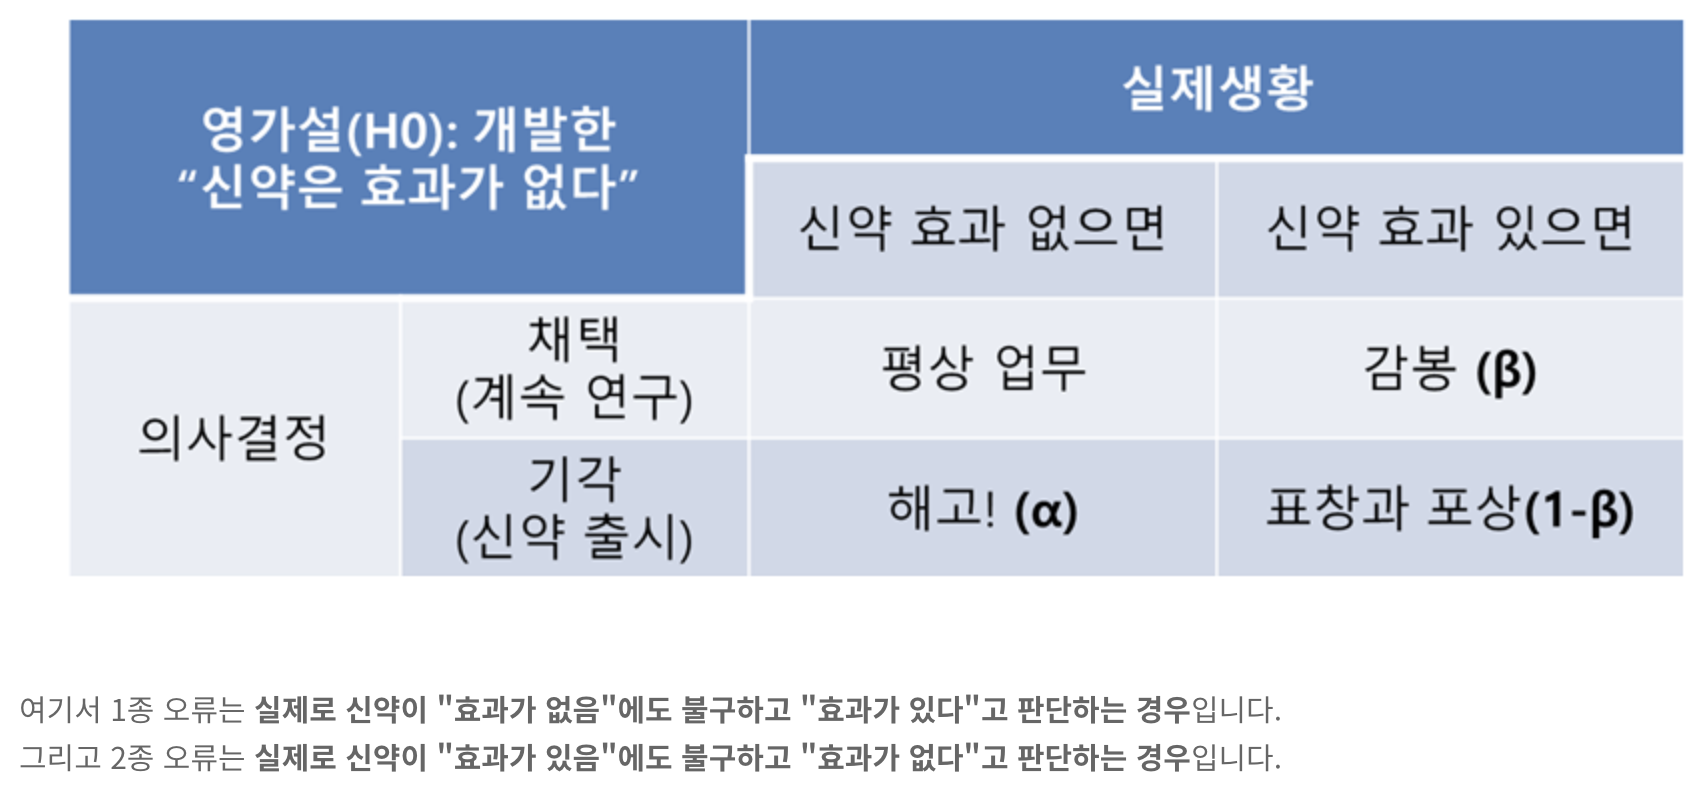

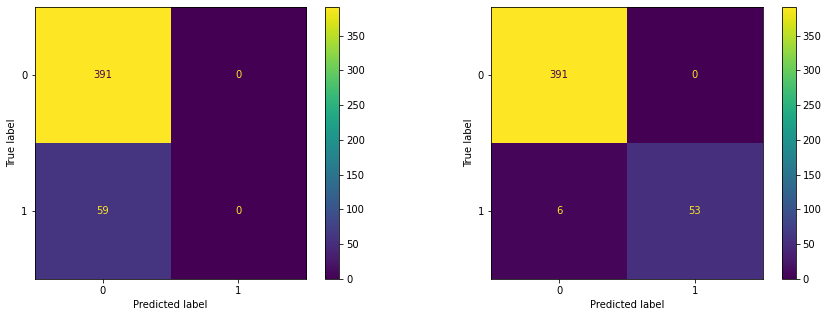

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_valid,pred_dummy) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

cm = confusion_matrix(y_valid,pred_clf) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[1])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_valid, pred_clf)

array([[391,   0],
       [  6,  53]])

- $\alpha$ 오류: 0개
- $\beta$ 오류: 6개 

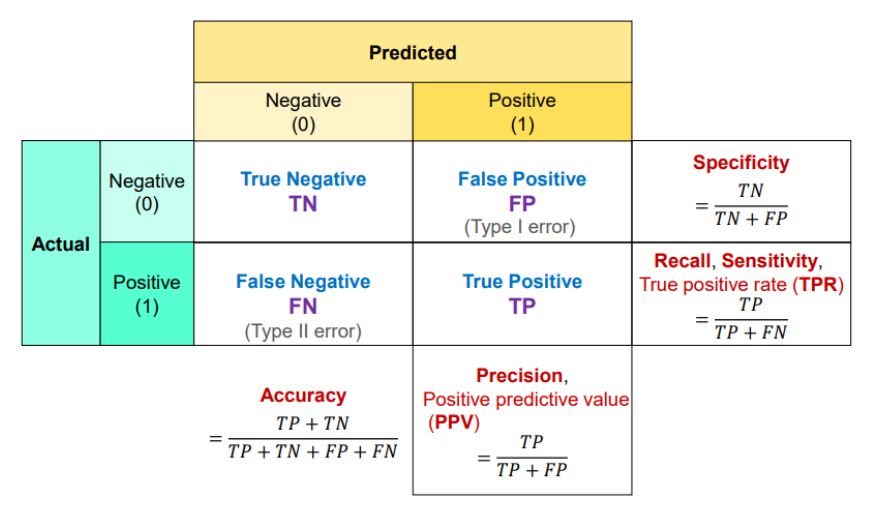

## ROC curve(Receiver Operating Characteristic curve)
- FPR를 X축으로, TPR을 Y축으로 정의하여 둘간의 관계를 표현한 그래프  
  - $ FPR = {FP \over FP + TN} $
  - $ TPR = {TP \over FN + TP} $

In [ ]:
pred_dummy = dummy.predict_proba(x_valid)[:,1] # 1에 대한 확률만 가져오겠다.
pred_tree = tree.predict_proba(x_valid)[:,1]

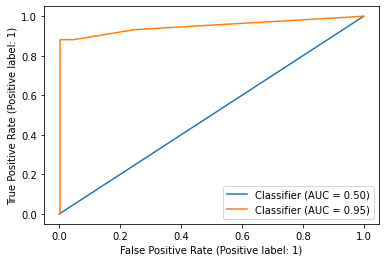

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig,ax = plt.subplots()
RocCurveDisplay.from_predictions(y_valid,pred_dummy,ax=ax)
RocCurveDisplay.from_predictions(y_valid,pred_tree,ax=ax)
plt.show()

### AUROC (Area Under ROC curve)
- ROC Curve의 밑부분 면적
- 넓을수록 모형 성능이 좋다.
- 임계값(threshold)이 어떻게 선택되었는지와 무관하게 모델의 예측 품질을 측정할 수 있다.
  - Poor model: 0.5 ~ 0.7
  - Fair model: 0.7 ~ 0.8
  - Good model: 0.8 ~ 0.9
  - Excellent model: 0.9 ~ 1.0

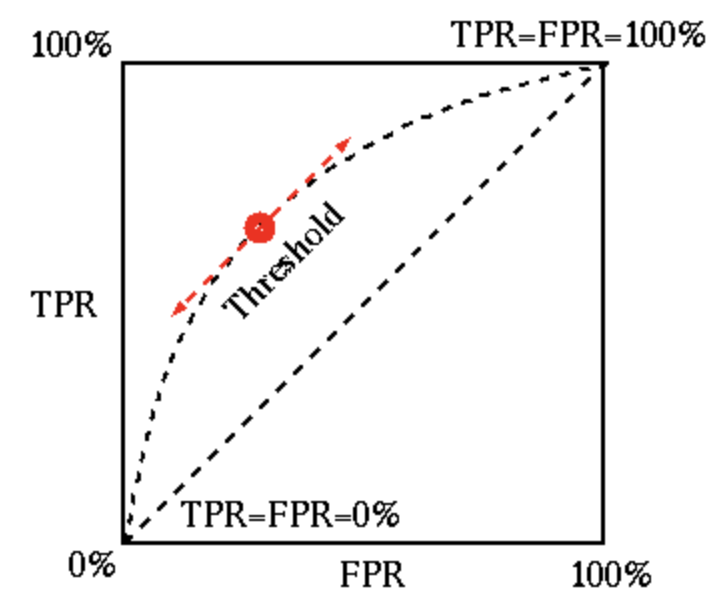

In [ ]:
from sklearn.metrics import roc_curve, auc 

fpr, tpr, thresholds = roc_curve(y_valid,pred_dummy)
print(f'dummy: {auc(fpr, tpr)}')
print('-'*50)
fpr, tpr, thresholds = roc_curve(y_valid,pred_tree)
print(f'model: {auc(fpr, tpr)}')

dummy: 0.5
--------------------------------------------------
model: 0.9479604664268065


## Multi Classification

### 예제(데이터 로드)

In [ ]:
digits = load_digits()

data = digits.data
target = digits.target

x_train,x_valid,y_train,y_valid = train_test_split(data,target,random_state=SEED)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

In [ ]:
tree = DecisionTreeClassifier(max_depth = 5 , random_state=SEED)
tree.fit(x_train,y_train)
pred = tree.predict(x_valid)

In [ ]:
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.32      0.32      0.32        37
           2       0.56      0.66      0.60        38
           3       0.87      0.85      0.86        46
           4       0.80      0.78      0.79        55
           5       0.73      0.19      0.30        59
           6       0.95      0.89      0.92        45
           7       0.90      0.68      0.78        41
           8       0.37      0.61      0.46        38
           9       0.52      0.85      0.65        48

    accuracy                           0.67       450
   macro avg       0.70      0.67      0.66       450
weighted avg       0.71      0.67      0.66       450



### Multi Classification 분류 방법

#### 소프트맥스 함수(Softmax Function)
  - 각 클래스에 대한 확률을 출력
  - 입력받은 값들을 0~1사이의 값들로 모두 정규화하며 출력값들의 합은 항상 1이 되는 특성을 가진 함수

$$
softmax(z) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$

> 아래소스코드의 소프트맥스식은 지수함수의 특성상 값이 급격히 커져 오버플로우 오류를 조금이라도 방지하고자 입력 값 중 최대값을 이용하여 모든 입력에서 동일하게 빼고 계산하였다.   
   
> 동일하게 뺀 경우와 그렇지 않은 경우의 소프트맥스 값은 수학적으로 같다.

1.0


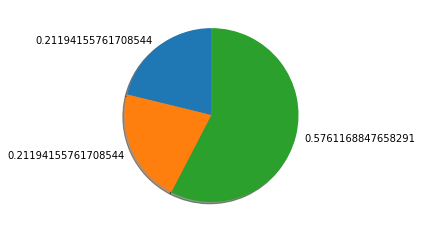

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
 
x = np.array([1.0,1.0,2.0])
 
y = softmax(x)
 
print(np.sum(y))
 
ratio = y
labels = y
 
plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()

> - 소프트맥스 입력값: 1.0, 1.0, 2.0
> - 소프트맥스 출력값(반올림): 0.2, 0.2, 0.6

출력값이 0.25, 0.25, 0.5가 아닌 0.2, 0.2, 0.6이 나왔다. 이런 결과가 나온 이유는 바로 exp(x) 때문이다.    
소프트맥스는 1과 2가 아닌 e^1 = 2.718, e^2 = 7.389 값을 계산에 이용한다.  
즉 입력값이 커짐에 따라 기울기가 증가하며 더 큰 차이가 발생한다. 따라서 0.2, 0.2, 0.6이 나온 것이다.


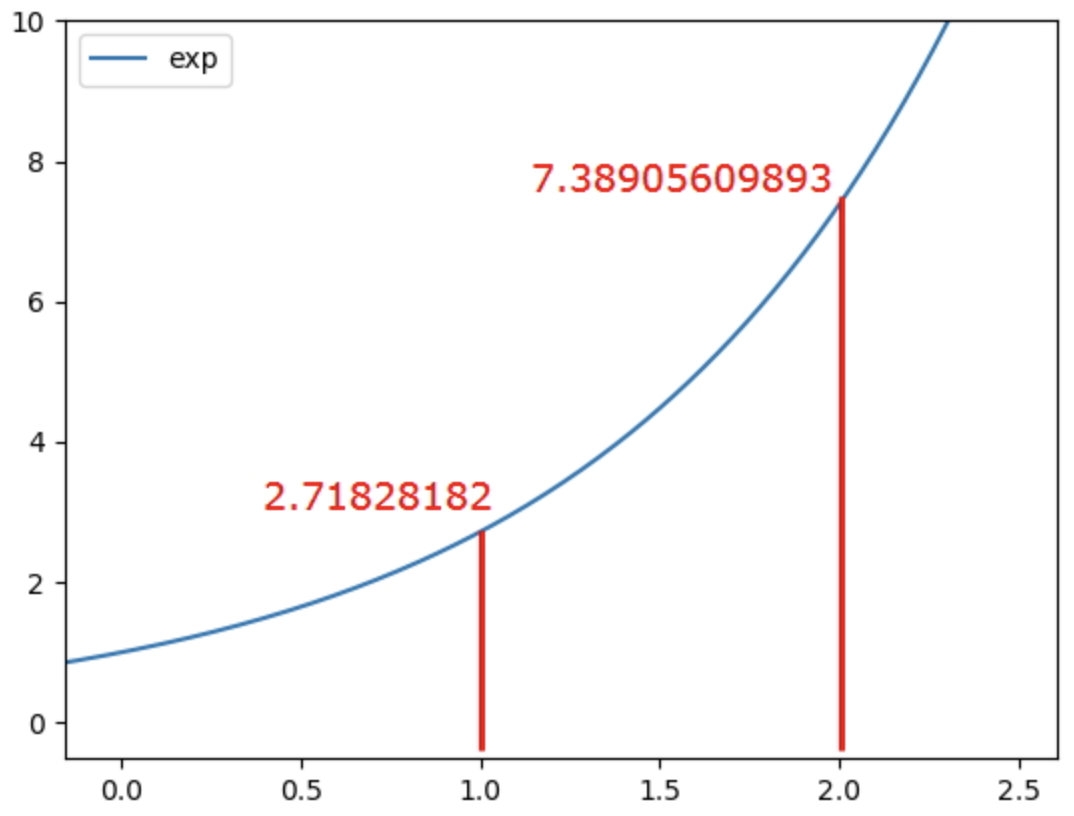

소프트맥스를 이용한 분류

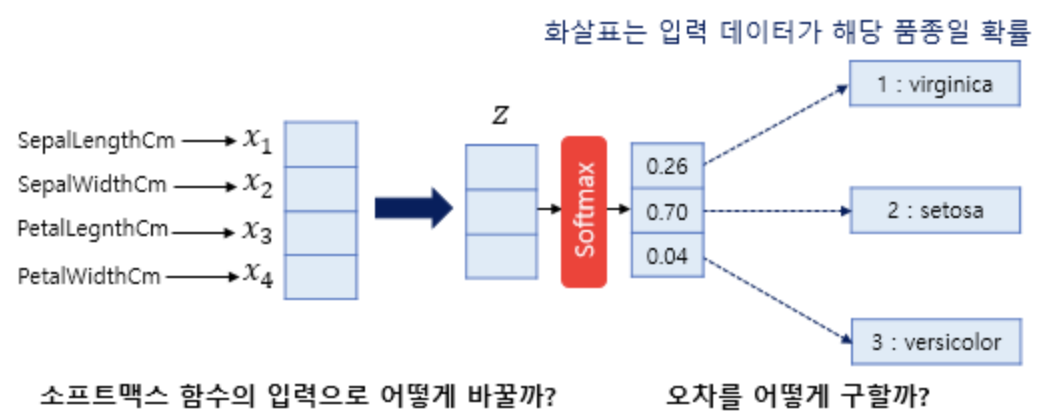

소프트맥스 출력합: 1.0


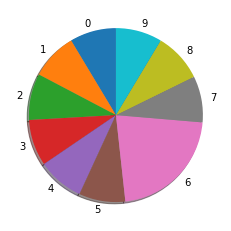

In [ ]:
x = tree.predict_proba(x_valid)[0]
 
y = softmax(x)
 
print(f'소프트맥스 출력합: {np.sum(y)}')
 
ratio = y
labels = [0,1,2,3,4,5,6,7,8,9]
 
plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()

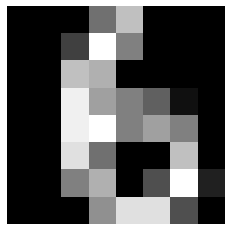

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 벡터 변환
digit_img = x_valid[0].reshape(8, 8)

plt.imshow(digit_img, cmap="gray")
plt.axis("off")
plt.show()

### Multi Classification 평가 방법

#### F1-Score
- micro
> 전체 클래스의 대하여 TP/FP/FN 구한 뒤에 F1-Score 계산
- macro
> 각 클래스에 대하여 F1-Score 계산뒤 산술 평균
- weighted
> 각 클래스에 대하여 F1-Score 계산뒤 각 클래스가 차지하는 비율에 따라 가중평균

In [ ]:
f1_score(y_valid,pred,average="micro")

0.6688888888888889

In [ ]:
f1_score(y_valid,pred,average="macro")

0.6620047429878985

In [ ]:
f1_score(y_valid,pred,average="weighted")

0.6616398619763888

#### logloss
- 모델이 예측한 확률 값을 반영해서 평가한다.
- 0에 가까울 수록 좋은 모델
- 정답에 해당하는 확률값들을 음의 로그함수에 넣어서 나온값들을 평균내서 평가

음의 로그함수
- 1을 넣으면 0이나온다. 0에 가까운 값을 넣을 수록 큰값이 나온다.

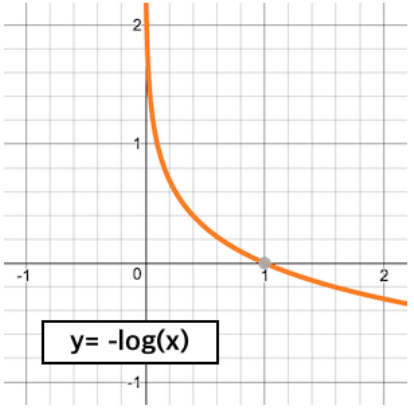

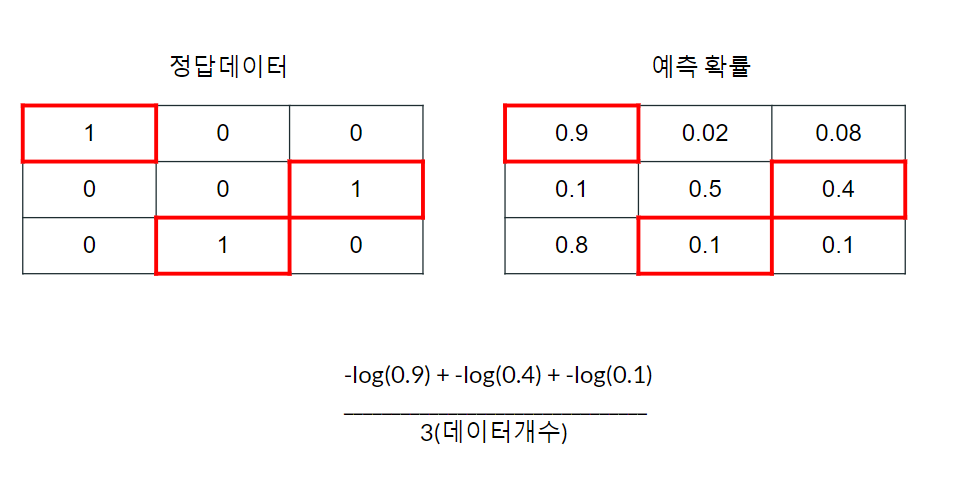

In [ ]:
from sklearn.metrics import log_loss

pred = tree.predict_proba(x_valid)
log_loss(y_valid,pred)

2.1647396191436967